In [1]:
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

In [3]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**read file**

In [6]:
df1=pd.read_csv('reviews .csv')
df1

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,V Jillian,Holly's place was great. It was exactly what I...
...,...,...,...,...,...,...
332535,806669295185663778,825457832546194561,2023-02-12,182856873,Daniel,everything good
332536,806669295185663778,825536403192043708,2023-02-12,122503306,Megan,Good place to stay to get the feel for San Fra...
332537,806669295185663778,829118888882627245,2023-02-17,285205676,Julia,"Dirty spots on sheets, dusty, very noisy, bad ..."
332538,806669295185663778,830519926292022175,2023-02-19,275711729,José Maria,El precio es acorde a lo reservado. Amable anf...


In [7]:
df1['date']=pd.to_datetime(df1['date'])
df1['year'],df1['month']=df1['date'].dt.year,df1['date'].dt.month
df1

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st...",2009,7
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...,2009,8
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...,2009,9
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...,2009,11
4,958,26008,2010-02-13,15416,V Jillian,Holly's place was great. It was exactly what I...,2010,2
...,...,...,...,...,...,...,...,...
332535,806669295185663778,825457832546194561,2023-02-12,182856873,Daniel,everything good,2023,2
332536,806669295185663778,825536403192043708,2023-02-12,122503306,Megan,Good place to stay to get the feel for San Fra...,2023,2
332537,806669295185663778,829118888882627245,2023-02-17,285205676,Julia,"Dirty spots on sheets, dusty, very noisy, bad ...",2023,2
332538,806669295185663778,830519926292022175,2023-02-19,275711729,José Maria,El precio es acorde a lo reservado. Amable anf...,2023,2


**Total dataset 332,540 row, 6 columns**

In [8]:
df1['year'].value_counts()

2022    70720
2019    53794
2018    43314
2021    40776
2017    33664
2016    24615
2020    22046
2015    15399
2023    10051
2014     9984
2013     4697
2012     2149
2011     1008
2010      289
2009       34
Name: year, dtype: int64

In [9]:
df=df1[df1['date'].dt.year==2022]
df

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month
290,218567,718891049608391462,2022-09-18,166221222,Josh,I really enjoyed my stay at Marins place in Ja...,2022,9
291,218567,792111113498988824,2022-12-28,70186342,Gerard,Had a great stay at Marin’s place. The locatio...,2022,12
407,646275,626868790380393842,2022-05-14,421324372,Jane,"A wonderful, eclectic and simple place to stay...",2022,5
420,646275,634075426770655543,2022-05-24,83166058,Fred,"Lynnore’s place is at a perfect location, very...",2022,5
421,646275,638414034697560330,2022-05-30,22117636,Liz,Great place! We would definitely stay here ag...,2022,5
...,...,...,...,...,...,...,...,...
332338,790778739346756455,794346155011496315,2022-12-31,490755882,Sreerag,It’s a great place if you are okay with sharin...,2022,12
332377,786618805820207551,789943016628813956,2022-12-25,311480190,Susana,La ubicación es muy buena. Todo queda al alcan...,2022,12
332378,786618805820207551,792201528520946874,2022-12-28,79364530,Montrez,Very responsive and accommodating host. The lo...,2022,12
332451,787041167027922671,788560461679467207,2022-12-23,78880853,Gretchen,Amazing stay at Kendall and Nick’s. The pictur...,2022,12


**Total dataset 70,720 rows, 6 columns**

**Explore dataset**

In [10]:
df.shape

(70720, 8)

<Axes: xlabel='month', ylabel='count'>

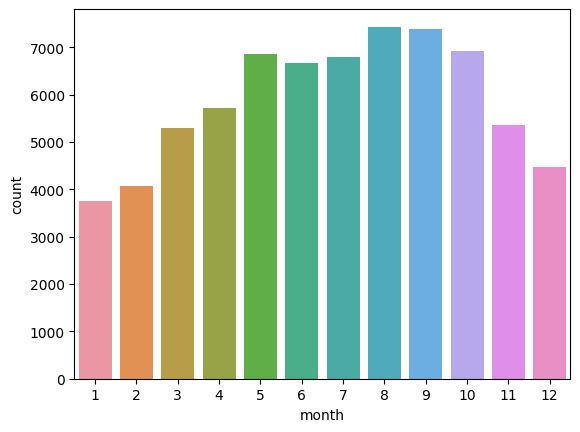

In [11]:
sns.countplot(x='month', data=df)

**reviews count shows from May to Octorber, San Francisco reviews almost double with December to Feburary, which means those five months is hottest season**

In [12]:
df['listing_id'].value_counts()

23313200              563
50488642              376
561489475078914207    362
569417447378815260    355
35642179              321
                     ... 
31568513                1
31492637                1
31441195                1
28442815                1
23326108                1
Name: listing_id, Length: 4286, dtype: int64

In [13]:
df['date'].value_counts().sort_values()

2022-01-25     64
2022-01-19     65
2022-02-03     79
2022-12-01     79
2022-12-02     81
             ... 
2022-11-06    368
2022-09-05    415
2022-09-23    445
2022-09-26    446
2022-08-08    510
Name: date, Length: 365, dtype: int64

In [14]:
df.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         9
year             0
month            0
dtype: int64

In [15]:
df.dropna(inplace=True)

<ipython-input-15-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [16]:
df.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
year             0
month            0
dtype: int64

In [17]:
df.dtypes

listing_id                int64
id                        int64
date             datetime64[ns]
reviewer_id               int64
reviewer_name            object
comments                 object
year                      int64
month                     int64
dtype: object

In [18]:
df['comments']=df['comments'].astype(pd.StringDtype())
df.dtypes

<ipython-input-18-be77e3df0118>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comments']=df['comments'].astype(pd.StringDtype())


listing_id                int64
id                        int64
date             datetime64[ns]
reviewer_id               int64
reviewer_name            object
comments                 string
year                      int64
month                     int64
dtype: object

In [19]:
wpt=nltk.WordPunctTokenizer()
stop_words=nltk.corpus.stopwords.words("english")

**preprocess text**

In [20]:
def preprocess_text(text):
  text=re.sub(r'http\S+',' ',str(text))
  text=re.sub(r'<.*?>',' ',str(text))
  #remove numbers and special characters
  text=re.sub('[^A-Za-z]+',' ',str(text))
  text=text.lower()
  return text

In [21]:
df['comments']=df['comments'].apply(preprocess_text)
df.head(10)

<ipython-input-21-d724a843a1b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comments']=df['comments'].apply(preprocess_text)


,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month
290,218567,718891049608391462,2022-09-18,166221222,Josh,i really enjoyed my stay at marins place in ja...,2022,9
291,218567,792111113498988824,2022-12-28,70186342,Gerard,had a great stay at marin s place the location...,2022,12
407,646275,626868790380393842,2022-05-14,421324372,Jane,a wonderful eclectic and simple place to stay ...,2022,5
420,646275,634075426770655543,2022-05-24,83166058,Fred,lynnore s place is at a perfect location very ...,2022,5
421,646275,638414034697560330,2022-05-30,22117636,Liz,great place we would definitely stay here agai...,2022,5
422,646275,642043716686863654,2022-06-04,134017902,Sue,great location and access to bus and trains wi...,2022,6
423,646275,646459968397549139,2022-06-10,23296575,Sarah,lynnore s place was a wonderful base for explo...,2022,6
424,646275,652946518127379571,2022-06-19,439977821,Adrienne,wonderful place great communication from lynnore,2022,6
425,646275,658815137207986581,2022-06-27,816903,Amy,what a wonderful convenient charming spot to s...,2022,6
426,646275,660933140825503112,2022-06-30,13489267,Sydnye,great location beautiful garden lynnore was a ...,2022,6


In [22]:
df['comments']=df['comments'].apply(lambda x:' '.join([word for word in x.split()if word not in (stop_words)]))
df.head(10)

<ipython-input-22-da01538f134a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comments']=df['comments'].apply(lambda x:' '.join([word for word in x.split()if word not in (stop_words)]))


,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month
290,218567,718891049608391462,2022-09-18,166221222,Josh,really enjoyed stay marins place japantown per...,2022,9
291,218567,792111113498988824,2022-12-28,70186342,Gerard,great stay marin place location great many res...,2022,12
407,646275,626868790380393842,2022-05-14,421324372,Jane,wonderful eclectic simple place stay sf feel l...,2022,5
420,646275,634075426770655543,2022-05-24,83166058,Fred,lynnore place perfect location easy get around...,2022,5
421,646275,638414034697560330,2022-05-30,22117636,Liz,great place would definitely stay lynnore grea...,2022,5
422,646275,642043716686863654,2022-06-04,134017902,Sue,great location access bus trains short walk lo...,2022,6
423,646275,646459968397549139,2022-06-10,23296575,Sarah,lynnore place wonderful base exploring san fra...,2022,6
424,646275,652946518127379571,2022-06-19,439977821,Adrienne,wonderful place great communication lynnore,2022,6
425,646275,658815137207986581,2022-06-27,816903,Amy,wonderful convenient charming spot stay much r...,2022,6
426,646275,660933140825503112,2022-06-30,13489267,Sydnye,great location beautiful garden lynnore fabulo...,2022,6


In [23]:
lemma=WordNetLemmatizer()
def text_preprocess(text):
  text=' '.join(lemma.lemmatize(word)for word in text.split(' '))
  return text

In [24]:
df['comments']=df['comments'].apply(text_preprocess)
df.head(10)

<ipython-input-24-938d5c13c806>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comments']=df['comments'].apply(text_preprocess)


,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month
290,218567,718891049608391462,2022-09-18,166221222,Josh,really enjoyed stay marins place japantown per...,2022,9
291,218567,792111113498988824,2022-12-28,70186342,Gerard,great stay marin place location great many res...,2022,12
407,646275,626868790380393842,2022-05-14,421324372,Jane,wonderful eclectic simple place stay sf feel l...,2022,5
420,646275,634075426770655543,2022-05-24,83166058,Fred,lynnore place perfect location easy get around...,2022,5
421,646275,638414034697560330,2022-05-30,22117636,Liz,great place would definitely stay lynnore grea...,2022,5
422,646275,642043716686863654,2022-06-04,134017902,Sue,great location access bus train short walk lov...,2022,6
423,646275,646459968397549139,2022-06-10,23296575,Sarah,lynnore place wonderful base exploring san fra...,2022,6
424,646275,652946518127379571,2022-06-19,439977821,Adrienne,wonderful place great communication lynnore,2022,6
425,646275,658815137207986581,2022-06-27,816903,Amy,wonderful convenient charming spot stay much r...,2022,6
426,646275,660933140825503112,2022-06-30,13489267,Sydnye,great location beautiful garden lynnore fabulo...,2022,6


In [25]:
comment_words=''
stopwords=set(STOPWORDS)

In [26]:
for val in df.comments:
  val=str(val)
  tokens=val.split()
  for i in range(len(tokens)):
    tokens[i]=tokens[i]
  comment_words+=" ".join(tokens)+" "

In [27]:
wordcloud=WordCloud(width=800,height=800,
                    background_color='pink',
                    min_font_size=10,max_words=100).generate(comment_words)

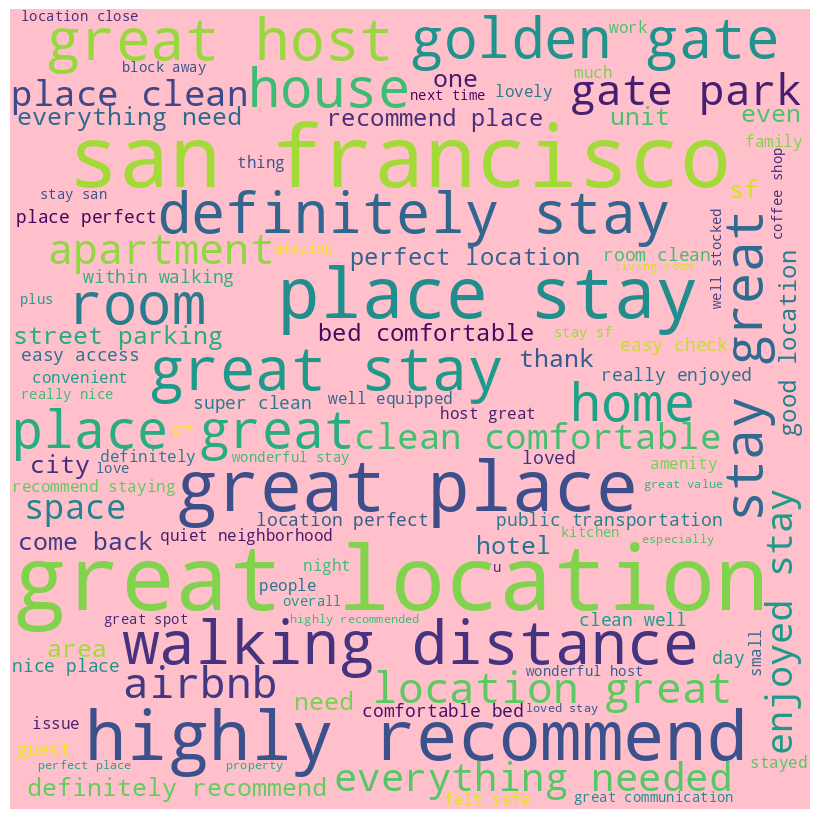

In [28]:
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

**Word Cloud shows people loves San Francisco Airbnb, Top words focus on "location" and "clean"**

In [31]:
df2=df['comments']
df2.head()

290    really enjoyed stay marins place japantown per...
291    great stay marin place location great many res...
407    wonderful eclectic simple place stay sf feel l...
420    lynnore place perfect location easy get around...
421    great place would definitely stay lynnore grea...
Name: comments, dtype: object

In [32]:
tv=TfidfVectorizer(min_df=0.2,max_df=0.8,norm='l2',
                   use_idf=True,smooth_idf=True)
tv_matrix=tv.fit_transform(df2)
tv_matrix=tv_matrix.toarray()
vocab=tv.get_feature_names_out()
pd.DataFrame(np.round(tv_matrix,2),columns=vocab)

,clean,great,host,location,place,stay
0,0.00,0.55,0.00,0.00,0.60,0.58
1,0.00,0.60,0.00,0.34,0.65,0.32
2,0.00,0.00,0.00,0.00,0.46,0.89
3,0.43,0.34,0.00,0.39,0.74,0.00
4,0.00,0.70,0.48,0.00,0.38,0.37
...,...,...,...,...,...,...
70706,0.00,0.67,0.00,0.00,0.74,0.00
70707,0.00,0.00,0.00,0.00,0.00,0.00
70708,0.00,0.00,0.77,0.64,0.00,0.00
70709,0.64,0.00,0.00,0.00,0.55,0.53


**TF-IDF another ways to support WordCloud, people thinks San Francisco Airbnb "great", they focus on "clean" and "location"**

In [29]:
!pip install textblob

**We use textblob to marked sentiment**

In [30]:
from textblob import TextBlob

In [26]:
df3=df.drop(columns=['listing_id','id','date','reviewer_id','reviewer_name','year','month'])
df3=df3.reset_index(drop=True)
df3

,comments
0,really enjoyed stay marins place japantown per...
1,great stay marin place location great many res...
2,wonderful eclectic simple place stay sf feel l...
3,lynnore place perfect location easy get around...
4,great place would definitely stay lynnore grea...
...,...
70706,great place okay sharing bathroom dog
70707,la ubicaci n e muy buena todo queda al alcance...
70708,responsive accommodating host location airbnb ...
70709,amazing stay kendall nick picture house justic...


In [27]:
df3[['polarity','subjectivity']]=df3['comments'].apply(lambda x:pd.Series(TextBlob(x).sentiment))
df3['target']=np.select([df3['polarity']>0,df3['polarity']<0],[1,0])
df3=df3.drop(['polarity','subjectivity'],axis=1)
df3

,comments,target
0,really enjoyed stay marins place japantown per...,1
1,great stay marin place location great many res...,1
2,wonderful eclectic simple place stay sf feel l...,1
3,lynnore place perfect location easy get around...,1
4,great place would definitely stay lynnore grea...,1
...,...,...
70706,great place okay sharing bathroom dog,1
70707,la ubicaci n e muy buena todo queda al alcance...,0
70708,responsive accommodating host location airbnb ...,1
70709,amazing stay kendall nick picture house justic...,1


In [28]:
countV=df3['target'].value_counts()
countV

1    66672
0     4039
Name: target, dtype: int64

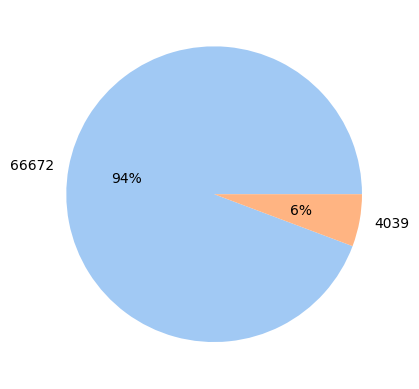

In [29]:
pie_color=sns.color_palette('pastel')
sentiment=['positive','negative']
plt.pie(countV,labels=countV,colors=pie_color,autopct='%.0f%%')
plt.show()

**The sentiment analysis support our hyphosis, 94% positive reviews vs 6% negative reviews**

**Because RAM limited, we need decrease our dataset, we decrease our dataset to 10102, use 7071(70%) to marked sentiment as train dataset, use 3031(30%) no marked sentiment as predict dataset**

In [31]:
df4=df.head(7071)
df4.head

<bound method NDFrame.head of        listing_id                  id       date  reviewer_id reviewer_name  \
290        218567  718891049608391462 2022-09-18    166221222          Josh   
291        218567  792111113498988824 2022-12-28     70186342        Gerard   
407        646275  626868790380393842 2022-05-14    421324372          Jane   
420        646275  634075426770655543 2022-05-24     83166058          Fred   
421        646275  638414034697560330 2022-05-30     22117636           Liz   
...           ...                 ...        ...          ...           ...   
82118     4464347  610874239451717032 2022-04-22    326521539         Kevin   
82119     4464347  612378432285991778 2022-04-24    195502561     Guadalupe   
82120     4464347  623210657087280850 2022-05-09    451307596       Kasanan   
82121     4464347  625437157069665675 2022-05-12    112744280          Will   
82122     4464347  626204374569054874 2022-05-13    250627846   Christopher   

                     

In [32]:
df4=df4.drop(columns=['listing_id','id','date','reviewer_id','reviewer_name','year','month'])
df4=df4.reset_index(drop=True)
df4[['polarity','subjectivity']]=df4['comments'].apply(lambda x:pd.Series(TextBlob(x).sentiment))
df4['target']=np.select([df4['polarity']>0,df4['polarity']<0],[1,0])
df4=df4.drop(['polarity','subjectivity'],axis=1)
df4

,comments,target
0,really enjoyed stay marins place japantown per...,1
1,great stay marin place location great many res...,1
2,wonderful eclectic simple place stay sf feel l...,1
3,lynnore place perfect location easy get around...,1
4,great place would definitely stay lynnore grea...,1
...,...,...
7066,great place awesome location would definitely ...,1
7067,great stay solo traveler clean lot bathroom av...,1
7068,good place nice activity,1
7069,friendly hostel social nice staff bunk bed noi...,1


In [33]:
countV=df4['target'].value_counts()
countV

1    6770
0     301
Name: target, dtype: int64

In [77]:
df5=df.tail(3031)
df5.head

<bound method NDFrame.head of                 listing_id                  id       date  reviewer_id  \
327590  633566725728505100  752255616952275819 2022-11-03    180641662   
327591  633566725728505100  754503667431495767 2022-11-06     76462794   
327592  633566725728505100  759502397566817894 2022-11-13     79921084   
327593  633566725728505100  768962936657502877 2022-11-26    197131876   
327596  613573252380942207  768954805837010224 2022-11-26    434202470   
...                    ...                 ...        ...          ...   
332338  790778739346756455  794346155011496315 2022-12-31    490755882   
332377  786618805820207551  789943016628813956 2022-12-25    311480190   
332378  786618805820207551  792201528520946874 2022-12-28     79364530   
332451  787041167027922671  788560461679467207 2022-12-23     78880853   
332452  787041167027922671  792909938226313633 2022-12-29    253694773   

       reviewer_name                                           comments  year  \


In [78]:
df5=df5.drop(columns=['listing_id','id','date','reviewer_id','reviewer_name','year','month'])
df5=df5.reset_index(drop=True)
df5

,comments
0,ricky good host answered quickly accommodation...
1,ricky place came advertised great location out...
2,ricky place true description extra appreciated...
3,great place stay quiet neighborhood close gold...
4,comfy great location near alot good food shop
...,...
3026,great place okay sharing bathroom dog
3027,la ubicaci n e muy buena todo queda al alcance...
3028,responsive accommodating host location airbnb ...
3029,amazing stay kendall nick picture house justic...


In [34]:
!pip install transformers

In [35]:
import os
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.utils import Sequence, to_categorical
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, GlobalMaxPooling1D, Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Flatten, BatchNormalization, Input
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from transformers import AutoTokenizer,TFBertModel
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification

**Use DistilBert to build model**

**train**

In [46]:
Tokenizer=DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
Bert=TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased",num_labels=1)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [47]:
X_train=Tokenizer(text=df4.comments.tolist(),
                        padding='longest',
                        truncation=True,
                        max_length=128,
                        return_tensors='tf',
                        return_token_type_ids=False,
                        return_attention_mask=True,
                        verbose=True)
print(X_train['input_ids'].shape, X_train['attention_mask'].shape)

(7071, 128) (7071, 128)


In [48]:
y_train=df4.target.values
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [52]:
input_ids=Input(shape=(None,),dtype=tf.int32,name='input_ids')
attention_mask=Input(shape=(None,),dtype=tf.int32,name='attention_mask')

inputs={'input_ids':input_ids,'attention_mask':attention_mask}

outputs=Bert(inputs)
logits=outputs.logits

model=tf.keras.Model(inputs=inputs,outputs=logits)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 attention_mask (InputLayer  [(None, None)]               0         []                            
 )                                                                                                
                                                                                                  
 input_ids (InputLayer)      [(None, None)]               0         []                            
                                                                                                  
 tf_distil_bert_for_sequenc  TFSequenceClassifierOutput   6695424   ['attention_mask[0][0]',      
 e_classification_1 (TFDist  (loss=None, logits=(None,    1          'input_ids[0][0]']           
 ilBertForSequenceClassific  1),                                                            

In [56]:
model.compile(optimizer=Adam(learning_rate=3e-4),
              loss=BinaryCrossentropy(from_logits=True),
              metrics=BinaryAccuracy('accuracy'))

results=model.fit(
    x={'input_ids':X_train['input_ids'],'attention_mask':X_train['attention_mask']},
    y=y_train,
    validation_split=0.3,
    epochs=6,
    batch_size=32,
    shuffle=True

)

Epoch 1/6
155/155 [==============================] - 2105s 13s/step - loss: 0.1349 - accuracy: 0.9654 - val_loss: 0.1400 - val_accuracy: 0.9529
Epoch 2/6
155/155 [==============================] - 2069s 13s/step - loss: 0.1531 - accuracy: 0.9503 - val_loss: 0.1819 - val_accuracy: 0.9590
Epoch 3/6
155/155 [==============================] - 2066s 13s/step - loss: 0.1557 - accuracy: 0.9646 - val_loss: 0.2096 - val_accuracy: 0.9505
Epoch 4/6
155/155 [==============================] - 2062s 13s/step - loss: 0.1685 - accuracy: 0.9604 - val_loss: 0.2085 - val_accuracy: 0.9505
Epoch 5/6
155/155 [==============================] - 2061s 13s/step - loss: 0.2052 - accuracy: 0.9543 - val_loss: 0.2069 - val_accuracy: 0.9505
Epoch 6/6
155/155 [==============================] - 2063s 13s/step - loss: 0.1705 - accuracy: 0.9604 - val_loss: 0.1970 - val_accuracy: 0.9505


**spend 3 hours 27 minutes,get train accuracy 0.96, validation accuracy 0.95, shows our model performance excellent, no overfitting**

In [62]:
model.save_weights("Airbnb_distilBert.h5")

**We can use our model do predict**

In [63]:
X_test=Tokenizer(text=df5.comments.tolist(),
                 add_special_tokens=True,
                 padding='longest',
                 truncation=True,
                 max_length=128,
                 return_tensors='tf',
                 return_token_type_ids=False,
                 return_attention_mask=True,
                 verbose=True)

In [64]:
predicted=model.predict({'input_ids':X_test['input_ids'],'attention_mask':X_test['attention_mask']})

95/95 [==============================] - 347s 4s/step


In [65]:
predicted=tf.nn.sigmoid(predicted)

In [66]:
predicted_marked=np.where(predicted>0.5,1,0)

In [79]:
df5['target']=predicted_marked
df5

,comments,target
0,ricky good host answered quickly accommodation...,1
1,ricky place came advertised great location out...,1
2,ricky place true description extra appreciated...,1
3,great place stay quiet neighborhood close gold...,1
4,comfy great location near alot good food shop,1
...,...,...
3026,great place okay sharing bathroom dog,1
3027,la ubicaci n e muy buena todo queda al alcance...,1
3028,responsive accommodating host location airbnb ...,1
3029,amazing stay kendall nick picture house justic...,1
